In [1]:
print("hi")

hi


In [2]:
import gzip

gt_count = dict() # 딕셔너리를 사용하면 key를 모르는 상태에서 세어도 키값까지 알려줌

with gzip.open("sample.ann.vcf.gz", "rt") as handle:
    for line in handle:
        if line.startswith("#"):
            continue

        row = line.strip().split("\t")  # 리스트로 가져와짐
        # print(row[-1])
        gt = row[-1].split(":")[0].replace("|", "/")  # 파이프를 슬래시로 바꿈 - 0|1과 1|0이 다른 의미이므로
        # print(gt)
        # _ = input()  # 한줄씩 과정을 볼 수 있음
        if gt not in gt_count:
            gt_count[gt] = 0

        gt_count[gt] += 1

print(gt_count)

{'1/1': 2133, '0/1': 6031, '1/2': 78}


In [5]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name" : ["Person1", "Person2", "Person3"],
        "Systolic" : [122, 134, 110],
        "Diastolic" : [79, 88, 76],

    }
)

print(df)
print(type(df))

      Name  Systolic  Diastolic
0  Person1       122         79
1  Person2       134         88
2  Person3       110         76
<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'Blood Pressure'}, xlabel='Name', ylabel='mmHg'>

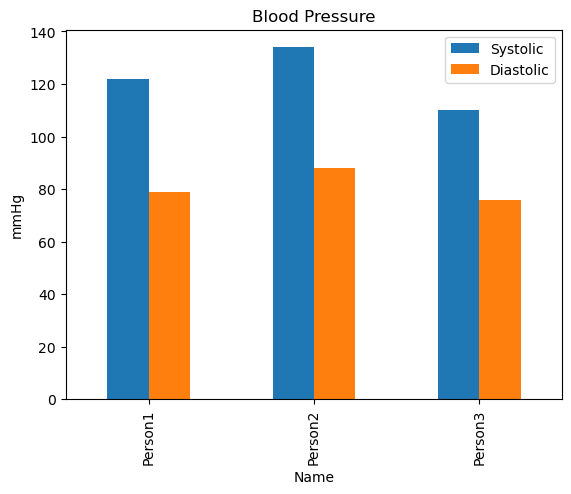

In [11]:
df.plot(
    kind="bar",
    x="Name",
    y=["Systolic", "Diastolic"],
    ylabel = "mmHg",
    title="Blood Pressure",
)

{'1/1': 2133, '0/1': 6031, '1/2': 78}
dict_keys(['1/1', '0/1', '1/2'])
dict_values([2133, 6031, 78])


<Axes: title={'center': 'genotype count'}, xlabel='genotype', ylabel='counts'>

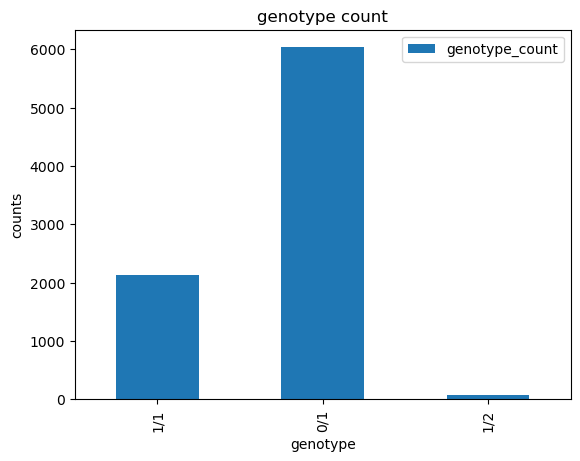

In [13]:
gt_data = {'1/1': 2133, '0/1': 6031, '1/2': 78}

print(gt_data)
print(gt_data.keys())
print(gt_data.values())

df_data = {"genotype" : gt_data.keys(), "genotype_count": gt_data.values()}

df = pd.DataFrame(df_data)
# print(df)

df.plot(
    kind="bar",
    x="genotype",
    y=["genotype_count"],
    ylabel = "counts",
    title="genotype count",
)